#### Preprocessing and Clustering Analysis Exploration: Obesity Level Analysis

Cluster analysis using K-Means algorithm is performed on the full dataset. To perform the cluster analysis, first, the class label, NObeyesdad is removed from the dataset. The dataset is transformed to ensure the correct data types exist for each feature. Dummy variables are created for the categorical features. The numeric dataset contains 2,111 rows and 43 columns.

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import importlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import completeness_score, homogeneity_score
from sklearn.metrics import silhouette_samples

In [2]:
%pwd

'/Users/cl'

In [3]:
# Load dataset to Pandas dataframe:
df = pd.read_csv('/Users/cl/ObesityDataset.csv', header=0)

In [4]:
# View dataframe:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
#remove the class label column
df2 = df.iloc[:,:16]
df2

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [6]:
# Create a copy to clean the data:
cleaned_data = df2
cleaned_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [7]:
# Convert FCVC, NCP, CH20, FAF, and TUE into a Categorical Feature by first, converting it from Float to Integer: 
cleaned_data['FCVC'] = cleaned_data['FCVC'].astype('int')
cleaned_data['NCP'] = cleaned_data['NCP'].astype('int')
cleaned_data['CH2O'] = cleaned_data['CH2O'].astype('int')
cleaned_data['FAF'] = cleaned_data['FAF'].astype('int')
cleaned_data['TUE'] = cleaned_data['TUE'].astype('int')

# Convert Age from Float to Integer:
cleaned_data['Age'] = cleaned_data['Age'].astype('int')
cleaned_data.dtypes

Gender                             object
Age                                 int64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                                int64
NCP                                 int64
CAEC                               object
SMOKE                              object
CH2O                                int64
SCC                                object
FAF                                 int64
TUE                                 int64
CALC                               object
MTRANS                             object
dtype: object

In [8]:
# Rename values in FCVC into Categorical Names: 
cleaned_data['FCVC'] = cleaned_data['FCVC'].replace({1: 'Never'})
cleaned_data['FCVC'] = cleaned_data['FCVC'].replace({2: 'Sometimes'})
cleaned_data['FCVC'] = cleaned_data['FCVC'].replace({3: 'Always'})

# Rename values in NCP into Categorical Names: 
cleaned_data['NCP'] = cleaned_data['NCP'].replace({1: '1'})
cleaned_data['NCP'] = cleaned_data['NCP'].replace({2: '2'})
cleaned_data['NCP'] = cleaned_data['NCP'].replace({3: '3'})
cleaned_data['NCP'] = cleaned_data['NCP'].replace({4: '3+'})

# Rename values in CH2O into Categorical Names: 
cleaned_data['CH2O'] = cleaned_data['CH2O'].replace({1: 'Less than a liter'})
cleaned_data['CH2O'] = cleaned_data['CH2O'].replace({2: 'Between 1 and 2 L'})
cleaned_data['CH2O'] = cleaned_data['CH2O'].replace({3: 'More than 2 L'})

# Rename values in FAF into Categorical Names: 
cleaned_data['FAF'] = cleaned_data['FAF'].replace({0: 'I do not have'})
cleaned_data['FAF'] = cleaned_data['FAF'].replace({1: '1 or 2 days'})
cleaned_data['FAF'] = cleaned_data['FAF'].replace({2: '2 or 4 days'})
cleaned_data['FAF'] = cleaned_data['FAF'].replace({3: '4 or 5 days'})

# Rename values in TUE into Categorical Names:
cleaned_data['TUE'] = cleaned_data['TUE'].replace({0: '0-2 Hours'})
cleaned_data['TUE'] = cleaned_data['TUE'].replace({1: '3-5 Hours'})
cleaned_data['TUE'] = cleaned_data['TUE'].replace({2: 'More than 5 Hours'})

cleaned_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21,1.620000,64.000000,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,I do not have,3-5 Hours,no,Public_Transportation
1,Female,21,1.520000,56.000000,yes,no,Always,3,Sometimes,yes,More than 2 L,yes,4 or 5 days,0-2 Hours,Sometimes,Public_Transportation
2,Male,23,1.800000,77.000000,yes,no,Sometimes,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,3-5 Hours,Frequently,Public_Transportation
3,Male,27,1.800000,87.000000,no,no,Always,3,Sometimes,no,Between 1 and 2 L,no,2 or 4 days,0-2 Hours,Frequently,Walking
4,Male,22,1.780000,89.800000,no,no,Sometimes,1,Sometimes,no,Between 1 and 2 L,no,I do not have,0-2 Hours,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20,1.710730,131.408528,yes,yes,Always,3,Sometimes,no,Less than a liter,no,1 or 2 days,0-2 Hours,Sometimes,Public_Transportation
2107,Female,21,1.748584,133.742943,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 Hours,Sometimes,Public_Transportation
2108,Female,22,1.752206,133.689352,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 Hours,Sometimes,Public_Transportation
2109,Female,24,1.739450,133.346641,yes,yes,Always,3,Sometimes,no,Between 1 and 2 L,no,1 or 2 days,0-2 Hours,Sometimes,Public_Transportation


In [9]:
# create dummy variables for cleaned dataset:
data_numeric = pd.get_dummies(cleaned_data)
pd.set_option("display.max_columns", 999)
data_numeric

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,21,1.620000,64.000000,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,21,1.520000,56.000000,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,23,1.800000,77.000000,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,27,1.800000,87.000000,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,22,1.780000,89.800000,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20,1.710730,131.408528,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2107,21,1.748584,133.742943,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2108,22,1.752206,133.689352,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2109,24,1.739450,133.346641,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [10]:
# Save Numeric Dataframe for future use:
data_numeric.to_csv('/Users/cl/Obesity_numeric.csv', index = False)

In [11]:
# Normalize the numeric dataset with Min-Max Scaling:
df_min_max_scaled = data_numeric.copy()
for column in df_min_max_scaled.columns:
    df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())

In [12]:
# View normalized data:
print(df_min_max_scaled)

           Age    Height    Weight  Gender_Female  Gender_Male  \
0     0.148936  0.320755  0.186567            1.0          0.0   
1     0.148936  0.132075  0.126866            1.0          0.0   
2     0.191489  0.660377  0.283582            0.0          1.0   
3     0.276596  0.660377  0.358209            0.0          1.0   
4     0.170213  0.622642  0.379104            0.0          1.0   
...        ...       ...       ...            ...          ...   
2106  0.127660  0.491943  0.689616            1.0          0.0   
2107  0.148936  0.563366  0.707037            1.0          0.0   
2108  0.170213  0.570200  0.706637            1.0          0.0   
2109  0.212766  0.546132  0.704079            1.0          0.0   
2110  0.191489  0.544974  0.705020            1.0          0.0   

      family_history_with_overweight_no  family_history_with_overweight_yes  \
0                                   0.0                                 1.0   
1                                   0.0          

In [13]:
# View class labels: 
labels_df =  df['NObeyesdad']
labels_df

0             Normal_Weight
1             Normal_Weight
2             Normal_Weight
3        Overweight_Level_I
4       Overweight_Level_II
               ...         
2106       Obesity_Type_III
2107       Obesity_Type_III
2108       Obesity_Type_III
2109       Obesity_Type_III
2110       Obesity_Type_III
Name: NObeyesdad, Length: 2111, dtype: object

In [14]:
# Transform class label into numeric: 
le = preprocessing.LabelEncoder()
labels_num = le.fit_transform(labels_df)
labels_num

array([1, 1, 1, ..., 4, 4, 4])

In [15]:
# View class label names and numeric association:
label_names = dict(zip(le.transform(le.classes_), le.classes_))
print(label_names)

{0: 'Insufficient_Weight', 1: 'Normal_Weight', 2: 'Obesity_Type_I', 3: 'Obesity_Type_II', 4: 'Obesity_Type_III', 5: 'Overweight_Level_I', 6: 'Overweight_Level_II'}


#### Clustering Exporation with K-Means:

Below is the exploration of clustering using K-means with the normalized data. Various values of k were tested and the centroids were evaluated to determine if a pattern appears in the clusters based on the data. For each value of K, the cluster centroids were examined to determine if any pattern exists in the data. A silhouette analysis is performed for to evaluate the separation between the resulting clusters and determine the quality of the clusters. The silhouette plots display a measure of how close each point in one cluster is to points in the neighboring clusters. The mean silhouette value is calculated and used as a threshold when determining the cluster quality. Clusters with most of their coefficients above the mean silhouette value are considered better quality which means that clusters are further away from the neighboring clusters. Clusters with most of their coefficients below the mean silhouette value reveals that samples are very close to the decision boundary between two neighboring clusters and negative coefficient values indicate that samples are assigned to the wrong cluster. When the silhouette plot does not display any negative coefficients and have the thickest plots visually above the silhouette mean, the correct number of K has been selected.

In [16]:
kmeans = KMeans(n_clusters=5, max_iter=500, verbose=1) #initialize k-means with n = 5

In [17]:
kmeans.fit(df_min_max_scaled)

Initialization complete
Iteration 0, inertia 11787.00508682668
Iteration 1, inertia 8566.056202078382
Iteration 2, inertia 8338.71778464269
Iteration 3, inertia 8237.82330971913
Iteration 4, inertia 8176.41527470928
Iteration 5, inertia 8099.540960517189
Iteration 6, inertia 8076.56013777138
Iteration 7, inertia 8068.9930112547
Iteration 8, inertia 8068.221972230656
Iteration 9, inertia 8068.076896983779
Iteration 10, inertia 8067.991083649056
Iteration 11, inertia 8067.917526159745
Iteration 12, inertia 8067.434112719851
Iteration 13, inertia 8067.300618383514
Iteration 14, inertia 8066.690183145394
Iteration 15, inertia 8065.724907535046
Iteration 16, inertia 8065.1555932972105
Iteration 17, inertia 8064.406578178977
Iteration 18, inertia 8055.777491215358
Iteration 19, inertia 8050.3019028424
Iteration 20, inertia 8042.536097506457
Iteration 21, inertia 8026.138983270792
Iteration 22, inertia 7994.538660965364
Iteration 23, inertia 7981.791935092773
Iteration 24, inertia 7972.431678

KMeans(max_iter=500, n_clusters=5, verbose=1)

In [18]:
clusters5 = kmeans.predict(df_min_max_scaled)

In [19]:
pd.DataFrame(clusters5, columns=["Cluster"])

,Cluster
0,2
1,0
2,2
3,3
4,3
...,...
2106,0
2107,0
2108,0
2109,0


In [20]:
def cluster_sizes(clusters):
    #clusters is an array of cluster labels for each instance in the data
    
    size = {}
    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]

    for c in cluster_labels:
        size[c] = len(df[clusters == c])
    return size

In [21]:
size5 = cluster_sizes(clusters5)

for c5 in size5.keys():
    print("Size of Cluster", c5, "= ", size5[c5])

Size of Cluster 0 =  420
Size of Cluster 1 =  423
Size of Cluster 2 =  455
Size of Cluster 3 =  355
Size of Cluster 4 =  458


In [22]:
# The centroids provide an aggregate representation and a characterization of each cluster:
pd.options.display.float_format='{:,.2f}'.format

centroids5 = pd.DataFrame(kmeans.cluster_centers_, columns=df_min_max_scaled.columns.values)
centroids5

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.19,0.43,0.52,1.00,0.00,0.00,1.00,0.05,0.95,0.90,0.06,0.04,0.03,0.01,0.96,0.00,0.01,0.05,0.92,0.02,0.99,0.01,0.65,0.32,0.03,0.98,0.02,0.36,0.03,0.01,0.60,0.90,0.08,0.02,0.00,0.01,0.96,0.03,0.02,-0.00,0.00,0.97,0.01
1,0.37,0.51,0.36,0.33,0.67,0.06,0.94,0.05,0.95,0.13,0.07,0.80,0.18,0.19,0.59,0.05,0.02,0.04,0.94,0.00,0.98,0.02,0.54,0.40,0.06,0.98,0.02,0.27,0.19,0.02,0.52,0.78,0.20,0.01,-0.00,0.06,0.59,0.35,0.99,0.00,0.00,-0.00,0.00
2,0.16,0.41,0.30,0.55,0.45,0.00,1.00,0.16,0.84,0.08,0.06,0.86,0.35,0.20,0.43,0.02,0.02,0.14,0.83,0.01,0.99,0.01,0.53,0.38,0.10,0.95,0.05,0.32,0.17,0.05,0.46,0.46,0.44,0.10,0.00,0.04,0.11,0.85,0.00,0.00,0.00,0.96,0.03
3,0.15,0.37,0.14,0.65,0.35,0.98,0.02,0.29,0.71,0.34,0.11,0.55,0.30,0.07,0.54,0.10,0.05,0.34,0.51,0.10,0.98,0.02,0.39,0.48,0.13,0.86,0.14,0.31,0.21,0.07,0.41,0.53,0.40,0.07,0.00,0.04,0.72,0.24,0.07,0.00,0.01,0.85,0.06
4,0.18,0.63,0.42,0.00,1.00,0.02,0.98,0.05,0.95,0.14,0.17,0.69,0.09,0.19,0.71,0.02,0.02,0.05,0.93,0.01,0.96,0.04,0.66,0.27,0.08,0.98,0.02,0.45,0.12,0.02,0.41,0.67,0.27,0.05,-0.00,0.02,0.97,0.01,-0.00,0.01,0.00,0.95,0.03


In [23]:
# Silhouette Analysis at n = 5:
c5_silhouette = metrics.silhouette_samples(df_min_max_scaled, clusters5)
print('Mean Silhouette Value :', c5_silhouette.mean())

Mean Silhouette Value : 0.12696817428675627


In [24]:
def plot_silhouettes(data, clusters, metric='euclidean'):
    
    from matplotlib import cm
    from sklearn.metrics import silhouette_samples

    cluster_labels = np.unique(clusters)
    n_clusters = cluster_labels.shape[0]
    silhouette_vals = metrics.silhouette_samples(data, clusters, metric='euclidean')
    c_ax_lower, c_ax_upper = 0, 0
    cticks = []
    for i, k in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[clusters == k]
        c_silhouette_vals.sort()
        c_ax_upper += len(c_silhouette_vals)
        color = cm.jet(float(i) / n_clusters)
        pl.barh(range(c_ax_lower, c_ax_upper), c_silhouette_vals, height=1.0, 
                      edgecolor='none', color=color)

        cticks.append((c_ax_lower + c_ax_upper) / 2)
        c_ax_lower += len(c_silhouette_vals)
    
    silhouette_avg = np.mean(silhouette_vals)
    pl.axvline(silhouette_avg, color="red", linestyle="--") 

    pl.yticks(cticks, cluster_labels)
    pl.ylabel('Cluster')
    pl.xlabel('Silhouette coefficient')

    pl.tight_layout()
    #pl.savefig('images/11_04.png', dpi=300)
    pl.show()
    
    return

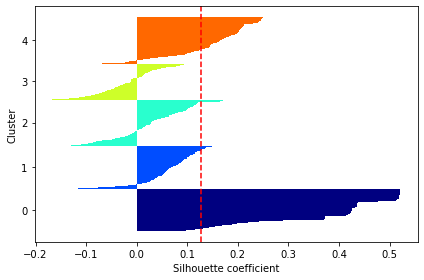

In [25]:
# Plot and Evaluate the Silhouettes:
plot_silhouettes(df_min_max_scaled, clusters5)

Above, the plot of the silhouettes shows that cluster 0 outperformed the other clusters with all its coefficients above the mean silhouette value. Cluster 4 also performed well with many of its coefficients above the mean silhouette value. The remaining three clusters did not perform as well since most of their coefficients are below the mean silhouette value. Four of the clusters display negative values with cluster 3 having the most negative coefficients, which indicates that 5 clusters are too high for the dataset.

In [26]:
kmeans3 = KMeans(n_clusters=3, max_iter=500, verbose=1) # k-means with n = 3

In [27]:
kmeans3.fit(df_min_max_scaled)

Initialization complete
Iteration 0, inertia 12879.623786128155
Iteration 1, inertia 9001.37311540421
Iteration 2, inertia 8858.998139520381
Iteration 3, inertia 8809.939108030303
Iteration 4, inertia 8791.272204868248
Iteration 5, inertia 8786.47670789417
Iteration 6, inertia 8785.4661617069
Iteration 7, inertia 8783.363746212328
Iteration 8, inertia 8772.54056168085
Iteration 9, inertia 8769.557983795672
Iteration 10, inertia 8768.483498001466
Iteration 11, inertia 8767.764124919666
Iteration 12, inertia 8766.35120571748
Iteration 13, inertia 8765.43867230093
Iteration 14, inertia 8765.398780834916
Converged at iteration 14: strict convergence.
Initialization complete
Iteration 0, inertia 14534.508672109176
Iteration 1, inertia 9309.441488842096
Iteration 2, inertia 9037.604181226367
Iteration 3, inertia 8938.658231693586
Iteration 4, inertia 8916.402643453937
Iteration 5, inertia 8888.331390013225
Iteration 6, inertia 8870.074074790271
Iteration 7, inertia 8861.211103290092
Iteratio

KMeans(max_iter=500, n_clusters=3, verbose=1)

In [28]:
clusters3 = kmeans3.predict(df_min_max_scaled)

In [29]:
size3 = cluster_sizes(clusters3)

for c in size3.keys():
    print("Size of Cluster", c, "= ", size3[c])

Size of Cluster 0 =  1058
Size of Cluster 1 =  636
Size of Cluster 2 =  417


In [30]:
# View centroids for an aggregate representation and a characterization of each cluster:
pd.options.display.float_format='{:,.2f}'.format

centroids3 = pd.DataFrame(kmeans3.cluster_centers_, columns=df_min_max_scaled.columns.values)
centroids3

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.22,0.58,0.39,-0.00,1.00,0.14,0.86,0.09,0.91,0.13,0.11,0.76,0.16,0.18,0.61,0.04,0.03,0.07,0.86,0.03,0.97,0.03,0.61,0.28,0.11,0.98,0.02,0.38,0.17,0.05,0.40,0.63,0.31,0.06,0.00,0.04,0.64,0.31,0.28,0.01,0.01,0.68,0.03
1,0.21,0.33,0.19,0.99,0.01,0.34,0.66,0.19,0.81,0.19,0.10,0.71,0.35,0.13,0.48,0.03,0.03,0.23,0.73,0.01,0.98,0.02,0.38,0.55,0.07,0.90,0.10,0.27,0.16,0.03,0.55,0.58,0.36,0.07,0.00,0.04,0.50,0.46,0.23,-0.00,0.00,0.74,0.03
2,0.19,0.43,0.52,0.99,0.01,0.04,0.96,0.06,0.94,0.95,0.05,0.01,0.01,0.01,0.97,0.00,0.01,0.04,0.93,0.02,0.99,0.01,0.69,0.29,0.01,0.98,0.02,0.36,0.04,0.01,0.59,0.91,0.08,0.01,0.00,0.00,0.97,0.03,0.05,-0.00,0.00,0.94,0.01


In [31]:
# Silhouette Analysis at n = 3:
c3_silhouette = metrics.silhouette_samples(df_min_max_scaled, clusters3)
print('Mean Silhouette Value :', c3_silhouette.mean())

Mean Silhouette Value : 0.11634874352766442


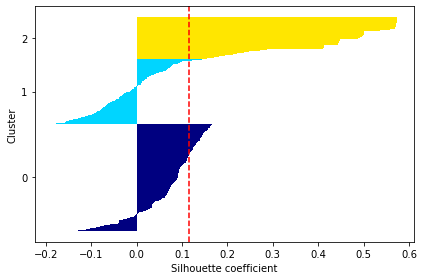

In [32]:
# Plot and Evaluate the Silhouettes:
plot_silhouettes(df_min_max_scaled, clusters3)

Above, shows the results of the silhouette analysis for K=3, which reveals that the algorithm performed neither better nor worse than at K = 5. The plot of the silhouettes shows that cluster 2 outperformed the other clusters with all its coefficients above the mean silhouette value. Cluster 1 performed the worst and did not have any coefficients above the mean silhouette value, but instead has negative coefficients. When evaluating the centroids, cluster 0 has Gender_Male with a value of 1.00 and Gender_Female with a value of 0. Cluster 0 most likely represents the male gender. Cluster 1 and 2 both contain a value of 0.99 for Gender_Female and 0.01 for Gender_Male, which shows that most likely Cluster 1 is misclassified. Most likely this cluster is pulling coefficients where it should not be and is too close to cluster 0 to be its own cluster. We can conclude from the silhouette plots that likely three cluster is still too high and that two clusters may be sufficient. 

In [33]:
kmeans2 = KMeans(n_clusters=2, max_iter=500, verbose=1) # k-means with n = 2

In [34]:
kmeans2.fit(df_min_max_scaled)

Initialization complete
Iteration 0, inertia 21141.470043487447
Iteration 1, inertia 10146.649638459037
Iteration 2, inertia 10052.393229584075
Iteration 3, inertia 9978.55949142651
Iteration 4, inertia 9931.576115637514
Iteration 5, inertia 9882.008890876072
Iteration 6, inertia 9833.033569152649
Iteration 7, inertia 9820.76522415991
Iteration 8, inertia 9810.381012107375
Iteration 9, inertia 9806.43745895125
Iteration 10, inertia 9802.52445906197
Iteration 11, inertia 9788.188974953495
Iteration 12, inertia 9784.590860736775
Iteration 13, inertia 9781.587461096071
Iteration 14, inertia 9764.62868015089
Iteration 15, inertia 9703.250240710777
Iteration 16, inertia 9654.064419604409
Iteration 17, inertia 9640.924590400316
Iteration 18, inertia 9633.269288654592
Iteration 19, inertia 9627.22637779535
Iteration 20, inertia 9626.211067157712
Iteration 21, inertia 9625.966275262466
Iteration 22, inertia 9625.900707169734
Iteration 23, inertia 9625.880356300455
Converged at iteration 23: st

KMeans(max_iter=500, n_clusters=2, verbose=1)

In [35]:
clusters2 = kmeans2.predict(df_min_max_scaled)

In [36]:
size2 = cluster_sizes(clusters2)

for c in size2.keys():
    print("Size of Cluster", c, "= ", size2[c])

Size of Cluster 0 =  1067
Size of Cluster 1 =  1044


In [37]:
# View centroids for an aggregate representation and a characterization of each cluster:
pd.options.display.float_format='{:,.2f}'.format

centroids2 = pd.DataFrame(kmeans2.cluster_centers_, columns=df_min_max_scaled.columns.values)
centroids2

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.22,0.58,0.39,-0.00,1.00,0.14,0.86,0.09,0.91,0.13,0.11,0.75,0.16,0.18,0.61,0.04,0.03,0.07,0.86,0.03,0.97,0.03,0.61,0.28,0.11,0.98,0.02,0.38,0.17,0.05,0.39,0.63,0.31,0.06,0.00,0.04,0.65,0.31,0.27,0.01,0.01,0.68,0.03
1,0.21,0.36,0.32,1.00,0.00,0.22,0.78,0.14,0.86,0.49,0.08,0.43,0.22,0.09,0.68,0.02,0.02,0.16,0.81,0.01,0.99,0.01,0.50,0.45,0.05,0.93,0.07,0.30,0.11,0.02,0.57,0.71,0.25,0.05,0.00,0.03,0.68,0.29,0.16,-0.00,0.00,0.82,0.02


In [38]:
# Silhouette Analysis at n = 2:
c2_silhouette = metrics.silhouette_samples(df_min_max_scaled, clusters2)
print('Mean Silhouette Value :', c2_silhouette.mean())

Mean Silhouette Value : 0.13093478332005926


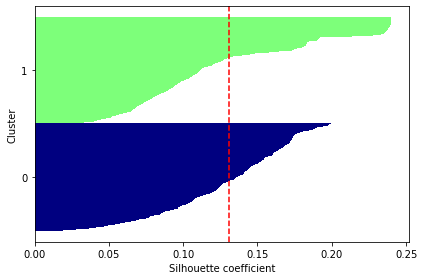

In [39]:
# Plot and Evaluate the Silhouettes:
plot_silhouettes(df_min_max_scaled, clusters2)

above shows the results of the silhouette analysis for K=2, which achieved the best silhouette plot compared to previous plots at K = 5 and K = 3. This silhouette plot shows that both cluster 0 and 1 have coefficients that are above the mean silhouette value and none of the coefficients are negative. Both clusters are neither thick nor full, although, cluster 0 appears thicker than cluster 1, but from the clustering results above, this result is most successful. When looking at the centroids, the two features that stand out that most likely represent the clusters compared to all other features is Gender_Male and Gender_Female. In cluster 0, Gender_Male has a value of 1.00 while Gender_Female has a value of -0.00 and in cluster 1, Gender_Female has a value of 1.00 while Gender_Male has a value 0.00. Moreover, we can conclude from the silhouette plots above that likely, cluster 0 represents males and cluster 1 represents female. This evaluation shows that a pattern exists by gender and that gender may play a role in the dataset and in determining classification of obesity levels.

#### Next, we will create age groups and seperate the age of each individual based on generation. Exploring age groups will allow us to re-evaluate the clusters and determine if a pattern exists also within age group for classification.

#### Discretize the Age attribute into 4 seperate age groups and re-run K-Means Clustering: 
#### Gen-Z (1997 – 2012), Age: 9 – 24

#### Millennials	(1981 – 1996), Age: 25 – 40

#### Gen-X (1965 – 1980), Age: 41 – 56

#### Boomers (1955 - 1964), Age: 57 - 66

In [40]:
data_numeric.Age.min() #youngest age in the dataset 

14

In [41]:
data_numeric.Age.max() #oldest age in the dataset

61

In [42]:
age_bins = pd.qcut(data_numeric.Age, [0, .61, .972, 1])
age_bins.head(5)

0    (13.999, 24.0]
1    (13.999, 24.0]
2    (13.999, 24.0]
3      (24.0, 40.0]
4    (13.999, 24.0]
Name: Age, dtype: category
Categories (3, interval[float64]): [(13.999, 24.0] < (24.0, 40.0] < (40.0, 61.0]]

In [43]:
age_bins = pd.qcut(data_numeric.Age, [0, .61, .972, 1], labels = ['Gen-Z', 'Millenials', 'Gen-X & Boomers'])
age_df = pd.concat([age_bins, df2['Age']], axis=1)
age_df.columns = ['Age Group', 'Age']
age_df.head(10)

,Age Group,Age
0,Gen-Z,21
1,Gen-Z,21
2,Gen-Z,23
3,Millenials,27
4,Gen-Z,22
5,Millenials,29
6,Gen-Z,23
7,Gen-Z,22
8,Gen-Z,24
9,Gen-Z,22


In [44]:
data_age_groups = data_numeric 
data_age_groups["Age"] = age_df['Age Group']

In [45]:
data_age_groups.head(10)

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Gen-Z,1.62,64.00,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,Gen-Z,1.52,56.00,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,Gen-Z,1.80,77.00,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,Millenials,1.80,87.00,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,Gen-Z,1.78,89.80,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
5,Millenials,1.62,53.00,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0
6,Gen-Z,1.50,55.00,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
7,Gen-Z,1.64,53.00,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
8,Gen-Z,1.78,64.00,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0
9,Gen-Z,1.72,68.00,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0


In [46]:
# Create Dummy Variables for Binned Dataset:
df_age_groups = pd.get_dummies(data_age_groups)
df_age_groups.head(5)

,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Age_Gen-Z,Age_Millenials,Age_Gen-X & Boomers
0,1.62,64.00,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0
1,1.52,56.00,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0
2,1.80,77.00,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0
3,1.80,87.00,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0
4,1.78,89.80,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0


K-means algorithm with the three generational age groups: Gen-Z, Millennials, and Gen-X and Boomers. This exploration is being explored to see if a pattern exists based on age range which the cluster analysis for the full dataset did not evaluate since the age groups were not grouped into categories. The youngest age is 14 and the oldest age is 61. The age groups are created by binning the Age attribute and then transforming the age group attribute into dummy variables. For exploratory purposes, K-means is performed on the dataset first without min-max normalization and second with min-max normalization at K = 3.

In [47]:
# Perform K-Means Clustering with N = 3:
kmeans = KMeans(n_clusters=3, max_iter=500, verbose=1) #initialize k-means with n = 3

In [48]:
kmeans.fit(df_age_groups)

Initialization complete
Iteration 0, inertia 266216.09575717594
Iteration 1, inertia 215521.27371160412
Iteration 2, inertia 210755.68046562248
Iteration 3, inertia 209722.10499704749
Iteration 4, inertia 209418.75170585237
Iteration 5, inertia 209024.46758980726
Iteration 6, inertia 208957.87320545508
Iteration 7, inertia 208952.94787903182
Converged at iteration 7: center shift 0.0008306717121226465 within tolerance 0.0015358503717230955.
Initialization complete
Iteration 0, inertia 502841.1735953951
Iteration 1, inertia 327560.09540897014
Iteration 2, inertia 315527.1447145528
Iteration 3, inertia 309720.53549766104
Iteration 4, inertia 300890.08942123153
Iteration 5, inertia 292303.3695465401
Iteration 6, inertia 287217.5099774456
Iteration 7, inertia 283800.36697429675
Iteration 8, inertia 278425.3310745159
Iteration 9, inertia 270545.8711724134
Iteration 10, inertia 246805.06029650217
Iteration 11, inertia 232750.70198980303
Iteration 12, inertia 226653.87489398956
Iteration 13, 

KMeans(max_iter=500, n_clusters=3, verbose=1)

In [49]:
age_clusters = kmeans.predict(df_age_groups)

In [50]:
size = cluster_sizes(age_clusters)

for c in size.keys():
    print("Size of Cluster", c, "= ", size[c])

Size of Cluster 0 =  789
Size of Cluster 1 =  731
Size of Cluster 2 =  591


In [51]:
# View centroids for an aggregate representation and a characterization of each cluster:
pd.options.display.float_format='{:,.2f}'.format

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=df_age_groups.columns.values)
centroids

,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Age_Gen-Z,Age_Millenials,Age_Gen-X & Boomers
0,1.70,82.18,0.39,0.61,0.13,0.87,0.12,0.88,0.15,0.11,0.75,0.26,0.19,0.52,0.02,0.02,0.07,0.86,0.04,0.98,0.02,0.53,0.35,0.12,0.97,0.03,0.31,0.17,0.05,0.47,0.65,0.29,0.06,0.00,0.06,0.56,0.38,0.31,0.00,0.01,0.64,0.03,0.64,0.31,0.04
1,1.74,116.59,0.44,0.56,0.00,1.00,0.01,0.99,0.50,0.07,0.44,0.08,0.13,0.79,0.00,0.01,0.01,0.99,0.00,0.98,0.02,0.62,0.35,0.03,1.00,0.00,0.43,0.03,0.00,0.54,0.83,0.15,0.01,0.00,0.01,0.85,0.14,0.16,0.00,0.00,0.83,0.00,0.43,0.56,0.01
2,1.65,55.37,0.69,0.31,0.48,0.52,0.23,0.77,0.29,0.12,0.59,0.21,0.07,0.63,0.09,0.05,0.30,0.62,0.03,0.98,0.02,0.52,0.41,0.07,0.87,0.13,0.28,0.25,0.05,0.42,0.50,0.42,0.09,0.00,0.02,0.57,0.41,0.15,0.01,0.01,0.79,0.05,0.90,0.10,0.00


In [52]:
centroids['Age_Gen-Z'] #clusters containing Gen-Z

0   0.64
1   0.43
2   0.90
Name: Age_Gen-Z, dtype: float64

In [53]:
centroids['Age_Millenials'] #clusters containing Millenials

0   0.31
1   0.56
2   0.10
Name: Age_Millenials, dtype: float64

In [54]:
centroids['Age_Gen-X & Boomers'] #clusters containing Gen-X and Boomers

0   0.04
1   0.01
2   0.00
Name: Age_Gen-X & Boomers, dtype: float64

In [55]:
# Silhouette Analysis at n = 3:
age_silhouette = metrics.silhouette_samples(df_age_groups, age_clusters)
print('Mean Silhouette Value :', age_silhouette.mean())

Mean Silhouette Value : 0.5691256560102319


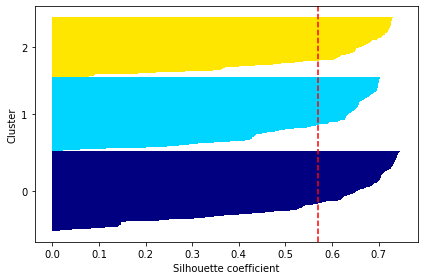

In [56]:
# Plot and Evaluate the Silhouettes:
plot_silhouettes(df_age_groups, age_clusters)

The results of cluster analysis without normalization shows a very healthy silhouette plot with all three clusters full, thick, and with coefficients above the mean silhouette value. Figure 2.1 below confirms that clusters when age is grouped by range. When looking at the centroids, cluster 2 shows Gen-Z at 0.9 while Millennials at .10 and Gen-X and Boomers at 0.00. Most likely Gen-Z is represented in cluster 2.

In [57]:
# Calculate Completeness and Homogeneity for the clusters:
complete = completeness_score(labels_num, age_clusters)
print(f"Completeness Score for Clusters: {complete}")
homogene = homogeneity_score(labels_num, age_clusters)
print(f"Homogeneity Score for Clusters: {homogene}")

Completeness Score for Clusters: 0.7020884578966542
Homogeneity Score for Clusters: 0.39448267211636195


The completeness and homogeneity scores were calculated for clusters since the class labels exist for further examination of the cluster quality. The completeness score was 0.70 which shows that members of a given class are assigned to the same cluster 70% of the time. The completeness score is positive and confirms that the clusters captured most of one class. The homogeneity score was much lower at 0.39 which shows that the clusters are not pure. These results may indicate that age group may be a factor in deciding the clusters for the data, but it may not be the main factor that affects obesity level for classification. The silhouette plots above display that a pattern exist but we must take into consideration that the data was not scaled. As such, we will next, perform K-means again with the data normalized to validate the results.

#### Perform K-Means with Normalized Data on Age Groups for Comparsion:

In [58]:
# Normalize the dataset with Min-Max Scaling:
df_age_groups_norm = df_age_groups.copy()
for column in df_age_groups_norm.columns:
    df_age_groups_norm[column] = (df_age_groups_norm[column] - df_age_groups_norm[column].min()) / (df_age_groups_norm[column].max() - df_age_groups_norm[column].min())

In [59]:
# View normalized data:
print(df_age_groups_norm)

      Height  Weight  Gender_Female  Gender_Male  \
0       0.32    0.19           1.00         0.00   
1       0.13    0.13           1.00         0.00   
2       0.66    0.28           0.00         1.00   
3       0.66    0.36           0.00         1.00   
4       0.62    0.38           0.00         1.00   
...      ...     ...            ...          ...   
2106    0.49    0.69           1.00         0.00   
2107    0.56    0.71           1.00         0.00   
2108    0.57    0.71           1.00         0.00   
2109    0.55    0.70           1.00         0.00   
2110    0.54    0.71           1.00         0.00   

      family_history_with_overweight_no  family_history_with_overweight_yes  \
0                                  0.00                                1.00   
1                                  0.00                                1.00   
2                                  0.00                                1.00   
3                                  1.00                    

In [60]:
# Perform K-Means Clustering with N = 3:
kmeans3 = KMeans(n_clusters=3, max_iter=500, verbose=1)

In [61]:
kmeans3.fit(df_age_groups_norm)

Initialization complete
Iteration 0, inertia 15293.30577388341
Iteration 1, inertia 9968.066331837832
Iteration 2, inertia 9920.180131785271
Iteration 3, inertia 9903.77236856074
Iteration 4, inertia 9896.176445738252
Iteration 5, inertia 9891.495588792406
Iteration 6, inertia 9889.624965572522
Iteration 7, inertia 9888.823257389276
Iteration 8, inertia 9888.487377405678
Iteration 9, inertia 9888.340285312179
Iteration 10, inertia 9888.20252958357
Iteration 11, inertia 9887.532993038576
Iteration 12, inertia 9887.504196402364
Converged at iteration 12: strict convergence.
Initialization complete
Iteration 0, inertia 15755.748152264905
Iteration 1, inertia 10291.16329342617
Iteration 2, inertia 10228.905860318164
Iteration 3, inertia 10188.107451127948
Iteration 4, inertia 10144.37857128053
Iteration 5, inertia 10107.001253617971
Iteration 6, inertia 10086.05688167689
Iteration 7, inertia 10077.969028399091
Iteration 8, inertia 10068.115905357135
Iteration 9, inertia 10054.640327576219


KMeans(max_iter=500, n_clusters=3, verbose=1)

In [62]:
clusters_norm3 = kmeans3.predict(df_age_groups_norm)

In [63]:
size3 = cluster_sizes(clusters_norm3)

for c in size3.keys():
    print("Size of Cluster", c, "= ", size3[c])

Size of Cluster 0 =  541
Size of Cluster 1 =  1018
Size of Cluster 2 =  552


In [64]:
# View centroids for an aggregate representation and a characterization of each cluster:
pd.options.display.float_format='{:,.2f}'.format

centroids3 = pd.DataFrame(kmeans3.cluster_centers_, columns=df_age_groups_norm.columns.values)
centroids3

,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,Age_Gen-Z,Age_Millenials,Age_Gen-X & Boomers
0,0.43,0.45,0.90,0.10,0.15,0.85,0.11,0.89,0.97,0.03,0.00,0.08,0.04,0.86,0.01,0.03,0.13,0.82,0.02,0.98,0.02,0.62,0.33,0.05,0.94,0.06,0.35,0.07,0.02,0.55,0.87,0.10,0.04,0.00,0.01,0.88,0.10,0.05,-0.00,0.00,0.92,0.02,0.62,0.37,0.01
1,0.48,0.27,0.39,0.61,0.26,0.74,0.14,0.86,0.08,0.13,0.79,0.24,0.15,0.55,0.06,0.03,0.15,0.79,0.04,0.99,0.01,0.56,0.33,0.11,0.95,0.05,0.33,0.21,0.05,0.41,0.49,0.43,0.08,0.00,0.03,0.55,0.42,0.07,0.00,0.00,0.89,0.03,0.99,0.01,0.00
2,0.51,0.42,0.30,0.70,0.07,0.93,0.07,0.93,0.08,0.10,0.82,0.20,0.19,0.61,0.00,0.01,0.04,0.94,0.01,0.96,0.04,0.50,0.46,0.05,0.99,0.01,0.36,0.09,0.02,0.53,0.81,0.18,0.01,0.00,0.05,0.66,0.29,0.64,0.00,0.01,0.32,0.02,0.01,0.92,0.07


In [65]:
centroids3['Age_Gen-Z'] #clusters containing Gen-Z Normalized

0   0.62
1   0.99
2   0.01
Name: Age_Gen-Z, dtype: float64

In [66]:
centroids3['Age_Millenials'] #clusters containing Millenials Normalized

0   0.37
1   0.01
2   0.92
Name: Age_Millenials, dtype: float64

In [67]:
centroids3['Age_Gen-X & Boomers'] #clusters containing Gen-X and Boomers Normalized

0   0.01
1   0.00
2   0.07
Name: Age_Gen-X & Boomers, dtype: float64

In [68]:
# Silhouette Analysis at n = 3:
age_norm_silhouette = metrics.silhouette_samples(df_age_groups_norm, clusters_norm3)
print('Mean Silhouette Value :', age_norm_silhouette.mean())

Mean Silhouette Value : 0.11905854619225616


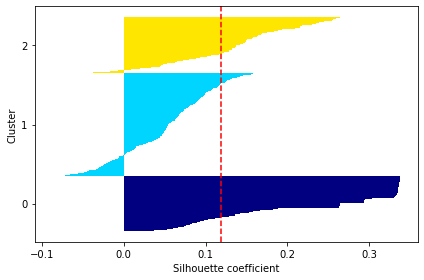

In [69]:
# Plot and Evaluate the Silhouettes:
plot_silhouettes(df_age_groups_norm, clusters_norm3)

Above, the results are drastically different from the results from the non-normalized data. Cluster 0 outperformed all other clusters with all its coefficients above the mean silhouette value. Cluster 2 performed adequately with many of its coefficients above the mean silhouette value and only a few of its coefficients in negative. Cluster 1 did not perform as well as many of the coefficients are in negative and none of them are above the mean silhouette value. When looking at the centroids, the values of the age group do not directly correspond to the silhouette plots.

In [70]:
# Calculate Completeness and Homogeneity for the clusters:
complete_norm = completeness_score(labels_num, clusters_norm3)
print(f"Completeness Score for Clusters: {complete_norm}")
homogene_norm = homogeneity_score(labels_num, clusters_norm3)
print(f"Homogeneity Score for Clusters: {homogene_norm}")

Completeness Score for Clusters: 0.3552093808452009
Homogeneity Score for Clusters: 0.19224754943375816


These results show that with the normalized data, a pattern may not necessarily appear in the age groups. Moreover, when examining K-means and clustering, we can see how not scaling the data may lead to conclusions or patterns about the data when a pattern may not necessarily exist. This is validated when evaluating the completeness and homogeneity scores, which both resulted in low scores. The completeness score was around 0.34 and the homogeneity score is lower at 0.18. These scores show that grouping by age is not the main determining factor for the classification of obesity levels. Age still may play a role as a key feature, but the clustering exploration does not necessary reveal that the age groupings have a significant pattern. By building the classification models and performing feature selection, we will be able to obtain a better picture of age and age groupings and their role in classifying obesity levels. 

----

##### Save Output of Data-Set (non-normalized) based on Age-Groups for Classifier Use: 

In [71]:
# Create a copy of the data with the Age Groups:
data_age_groups = data_numeric 
data_age_groups["Age"] = age_df['Age Group']

In [72]:
data_age_groups

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,Gen-Z,1.62,64.00,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0
1,Gen-Z,1.52,56.00,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0
2,Gen-Z,1.80,77.00,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0
3,Millenials,1.80,87.00,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1
4,Gen-Z,1.78,89.80,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Gen-Z,1.71,131.41,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2107,Gen-Z,1.75,133.74,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2108,Gen-Z,1.75,133.69,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2109,Gen-Z,1.74,133.35,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [73]:
# Add the class labels as a column to the dataset:
data_age_groups['NObeyesdad'] = labels_df
data_age_groups

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,Gen-Z,1.62,64.00,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,Normal_Weight
1,Gen-Z,1.52,56.00,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,Normal_Weight
2,Gen-Z,1.80,77.00,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Normal_Weight
3,Millenials,1.80,87.00,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,Overweight_Level_I
4,Gen-Z,1.78,89.80,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Gen-Z,1.71,131.41,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2107,Gen-Z,1.75,133.74,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2108,Gen-Z,1.75,133.69,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2109,Gen-Z,1.74,133.35,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III


In [74]:
genz_df = data_age_groups[data_age_groups["Age"] == 'Gen-Z']
genz_df

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
0,Gen-Z,1.62,64.00,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,Normal_Weight
1,Gen-Z,1.52,56.00,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,Normal_Weight
2,Gen-Z,1.80,77.00,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Normal_Weight
4,Gen-Z,1.78,89.80,0,1,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,Overweight_Level_II
6,Gen-Z,1.50,55.00,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Gen-Z,1.71,131.41,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2107,Gen-Z,1.75,133.74,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2108,Gen-Z,1.75,133.69,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2109,Gen-Z,1.74,133.35,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III


In [75]:
#Save Gen-Z dataframe to CSV:
genz_df.to_csv('/Users/cl/genz_dataframe.csv', index = False)

In [76]:
millen_df = data_age_groups[data_age_groups["Age"] == 'Millenials']
millen_df

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
3,Millenials,1.80,87.00,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,Overweight_Level_I
5,Millenials,1.62,53.00,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,Normal_Weight
10,Millenials,1.85,105.00,0,1,0,1,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,Obesity_Type_I
16,Millenials,1.93,102.00,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,Overweight_Level_II
17,Millenials,1.53,78.00,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2098,Millenials,1.61,104.95,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2099,Millenials,1.63,108.09,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2100,Millenials,1.63,107.38,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III
2101,Millenials,1.63,107.22,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,Obesity_Type_III


In [77]:
# Save Millenials dataframe to CSV:
millen_df.to_csv('/Users/cl/millenials_dataframe.csv', index = False)

In [78]:
genxboomers_df = data_age_groups[data_age_groups["Age"] == 'Gen-X & Boomers']
genxboomers_df

,Age,Height,Weight,Gender_Female,Gender_Male,family_history_with_overweight_no,family_history_with_overweight_yes,FAVC_no,FAVC_yes,FCVC_Always,FCVC_Never,FCVC_Sometimes,NCP_1,NCP_2,NCP_3,NCP_3+,CAEC_Always,CAEC_Frequently,CAEC_Sometimes,CAEC_no,SMOKE_no,SMOKE_yes,CH2O_Between 1 and 2 L,CH2O_Less than a liter,CH2O_More than 2 L,SCC_no,SCC_yes,FAF_1 or 2 days,FAF_2 or 4 days,FAF_4 or 5 days,FAF_I do not have,TUE_0-2 Hours,TUE_3-5 Hours,TUE_More than 5 Hours,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad
13,Gen-X & Boomers,1.80,99.00,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,Obesity_Type_I
21,Gen-X & Boomers,1.69,87.00,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,Obesity_Type_I
92,Gen-X & Boomers,1.78,84.00,0,1,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,Overweight_Level_I
133,Gen-X & Boomers,1.65,66.00,1,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,Normal_Weight
137,Gen-X & Boomers,1.60,80.00,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,Obesity_Type_I
161,Gen-X & Boomers,1.65,80.00,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,Overweight_Level_II
169,Gen-X & Boomers,1.63,77.00,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,Overweight_Level_II
197,Gen-X & Boomers,1.75,118.00,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,Obesity_Type_II
201,Gen-X & Boomers,1.54,80.00,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,Obesity_Type_I
232,Gen-X & Boomers,1.59,50.00,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,Normal_Weight


In [79]:
# Save Gen-X and Boomers dataframe to CSV:
genxboomers_df.to_csv('/Users/cl/genxboomers_dataframe.csv', index = False)